# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Exploring the Dataset

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Cleaning

In [8]:
df.duplicated().sum()

1081

In [9]:
df = df.drop_duplicates()

# Exploratory Data Analysis (EDA)

In [10]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

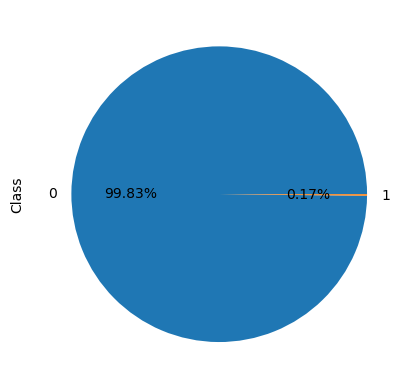

In [11]:
df["Class"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

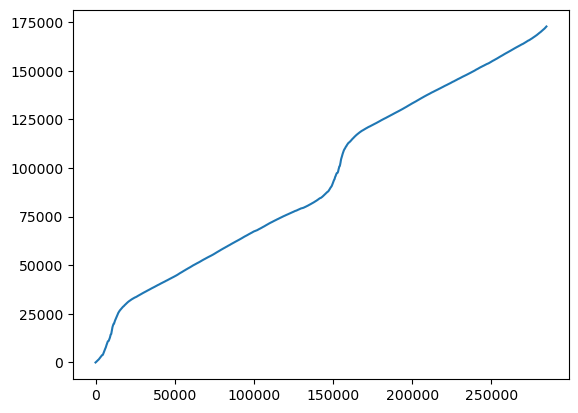

In [12]:
plt.plot(df["Time"])

<AxesSubplot:xlabel='Class', ylabel='count'>

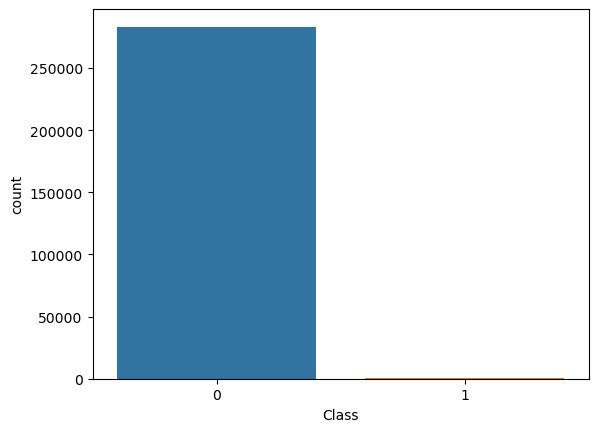

In [13]:
sns.countplot(df["Class"])

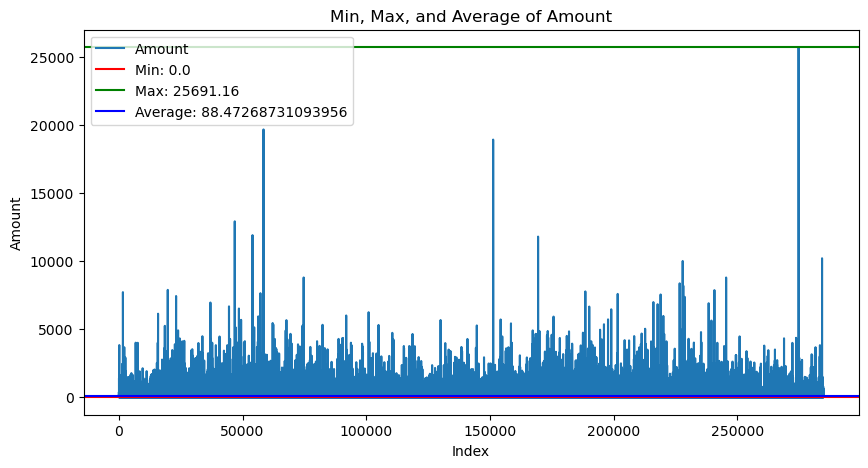

In [14]:
min_val = df['Amount'].min()
max_val = df['Amount'].max()
avg_val = df['Amount'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df['Amount'], label='Amount')
plt.axhline(y=min_val, color='r', linestyle='-', label=f'Min: {min_val}')
plt.axhline(y=max_val, color='g', linestyle='-', label=f'Max: {max_val}')
plt.axhline(y=avg_val, color='b', linestyle='-', label=f'Average: {avg_val}')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Min, Max, and Average of Amount')
plt.legend()
plt.show()

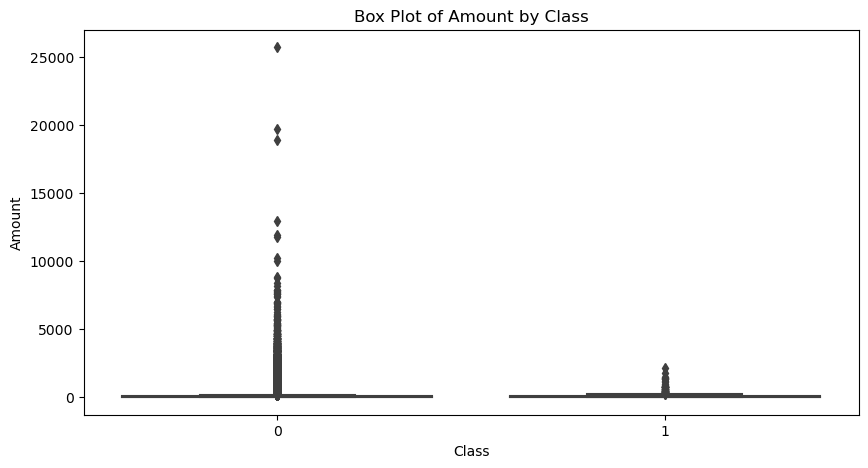

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Class')
plt.show()

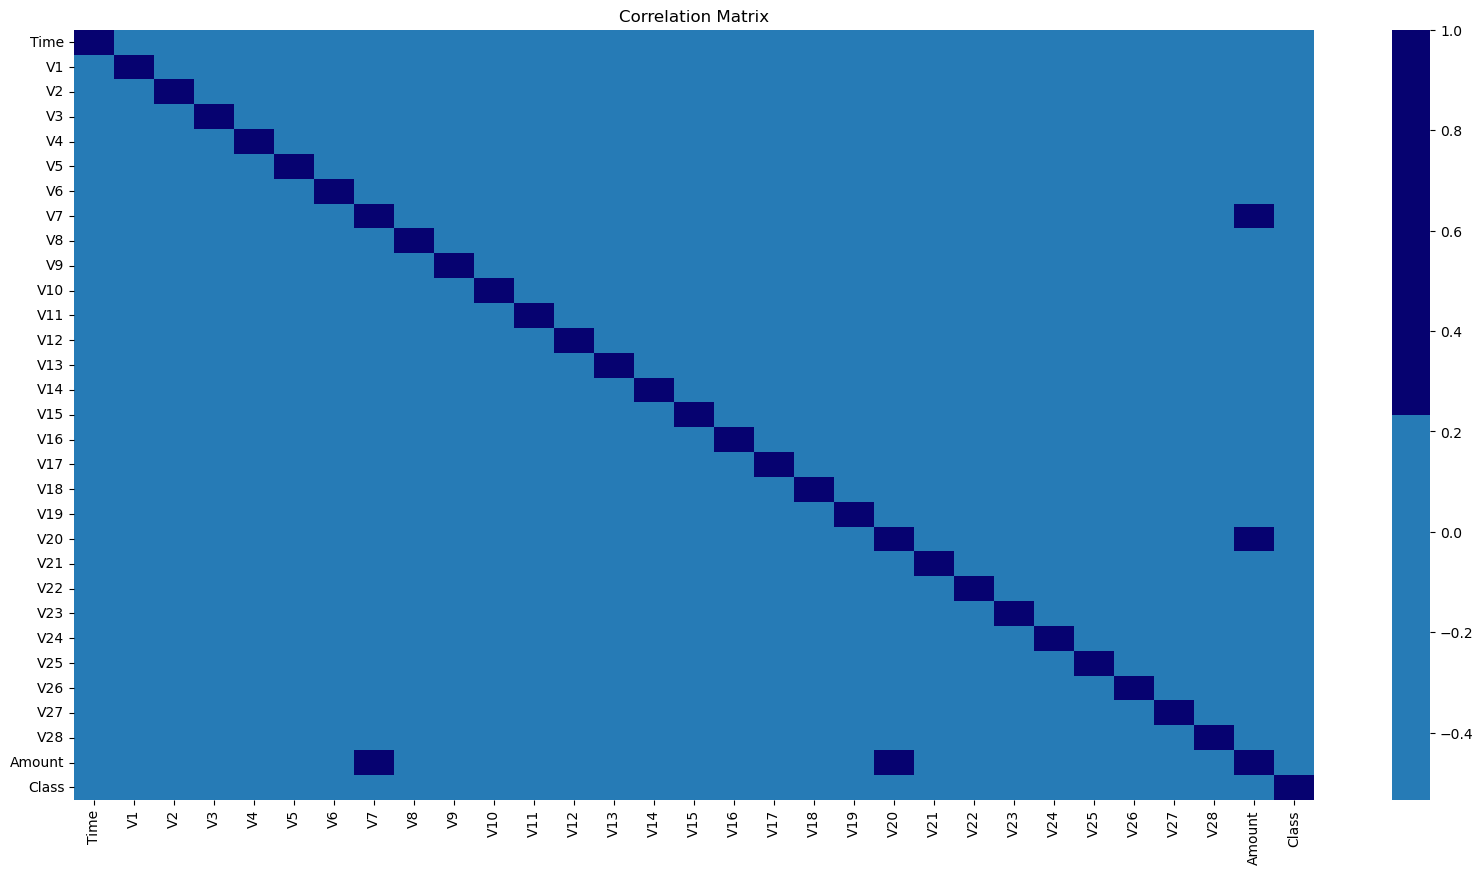

In [16]:
colors = ['#267BB6','#060270']
plt.figure(figsize=(20,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap = colors)
plt.title('Correlation Matrix')
plt.show()

# Handling Imbalanced Data

In [17]:
!pip install imbalanced-learn

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
y = df["Class"]
X = df.iloc[:,:30]

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5) 
X, y = sm.fit_resample(X, y)
y.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

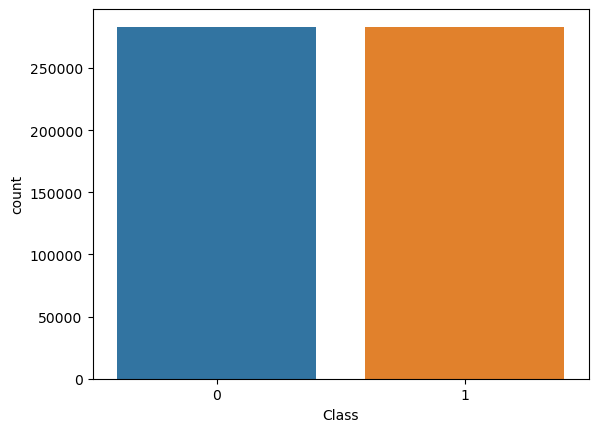

In [21]:
sns.countplot(y)

In [22]:
s = StandardScaler()
df["Amount"] = s.fit_transform(df[["Amount"]])
df["Time"] = s.fit_transform(df[["Time"]])

# Model Training and Evaluation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier

Score of training set 1.0
Score of testing set 0.9998823197138016
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



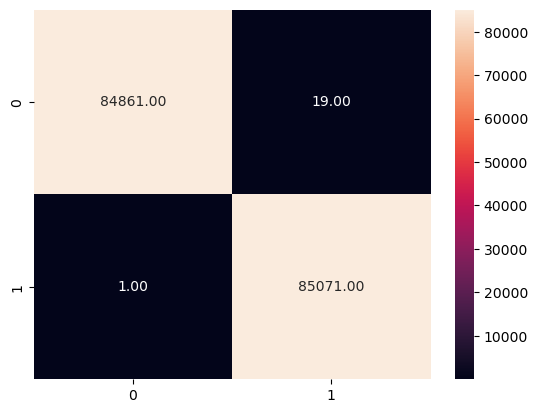

In [24]:
pipe1 = RandomForestClassifier(n_estimators = 20)
pipe1.fit(X_train, y_train)
print("Score of training set",pipe1.score(X_train, y_train))
print("Score of testing set", pipe1.score(X_test, y_test))
y_pred = pipe1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print(classification_report(y_test, pipe1.predict(X_test)))

Cross Validation Score :  100.00%
ROC_AUC Score :  99.99%


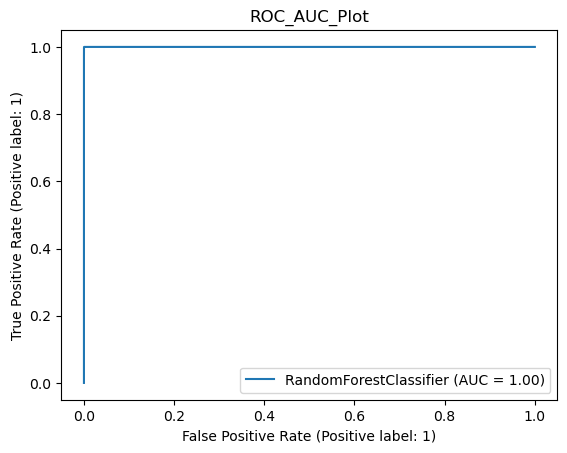

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(pipe1,X_train,y_train,cv = 5,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))
plot_roc_curve(pipe1, X_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

# Decision Tree Classifier

Score of training set 1.0
Score of testing set 0.9983877800790811
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



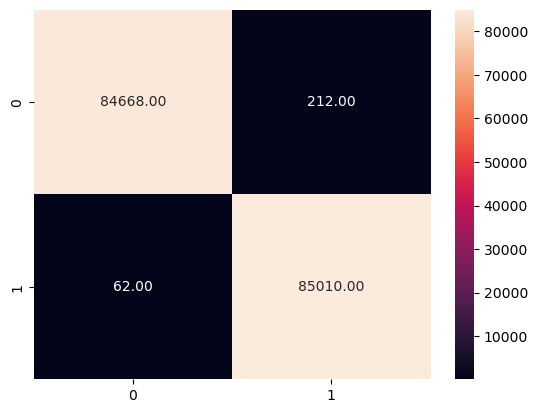

In [29]:
pipe = DecisionTreeClassifier()
pipe.fit(X_train, y_train)

print("Score of training set",pipe.score(X_train, y_train))
print("Score of testing set", pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print(classification_report(y_test, pipe.predict(X_test)))

Cross Validation Score :  99.79%
ROC_AUC Score :  99.84%


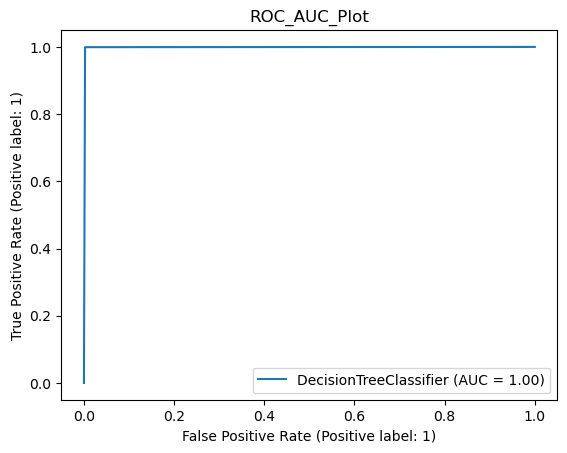

In [30]:
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(pipe,X_train,y_train,cv = 5,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))
plot_roc_curve(pipe, X_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

Due to the use of SMOTE analysis for balancing the data, the models trained on this synthetic data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.